# [Chapter 2 - A little more on PyMC](http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter2_MorePyMC/Ch2_MorePyMC_PyMC2.ipynb)

In [31]:
%matplotlib inline

In [44]:
import pymc as pm
import numpy as np
import pandas as pd

In [2]:
parameter = pm.Exponential("poisson_param", 1)
data_generator = pm.Poisson("data_generator", parameter)
data_plus_one = data_generator + 1

In [8]:
print "Children of `parameter`: "
print parameter.children 
print "\nParents of `data_generator`: "
print data_generator.parents
print "\nChildren of `data_generator`: "
print data_generator.children

Children of `parameter`: 
set([<pymc.distributions.Poisson 'data_generator' at 0x7f000c17efd0>])

Parents of `data_generator`: 
{'mu': <pymc.distributions.Exponential 'poisson_param' at 0x7f000c195090>}

Children of `data_generator`: 
set([<pymc.PyMCObjects.Deterministic '(data_generator_add_1)' at 0x7f000c17e950>])


In [6]:
print "parameter.value =", parameter.value
print "data_generator.value =", data_generator.value
print "data_plus_one.value =", data_plus_one.value

parameter.value = 0.227667900915
data_generator.value = 0
data_plus_one.value = 1


In [14]:
lambda_1 = pm.Exponential("lambda_1", 1)  # prior on first behaviour
lambda_2 = pm.Exponential("lambda_2", 1)  # prior on second behaviour
tau = pm.DiscreteUniform("tau", lower=0, upper=10)  # prior on behaviour change

print "lambda_1.value = %.3f" % lambda_1.value
print "lambda_2.value = %.3f" % lambda_2.value
print "tau.value = %.3f" % tau.value

lambda_1.random(), lambda_2.random(), tau.random()

print("After calling random() on the variables...")
print("lambda_1.value = %.3f" % lambda_1.value)
print("lambda_2.value = %.3f" % lambda_2.value)
print("tau.value = %.3f" % tau.value)

lambda_1.value = 0.186
lambda_2.value = 0.087
tau.value = 6.000
After calling random() on the variables...
lambda_1.value = 4.659
lambda_2.value = 1.876
tau.value = 6.000


In [32]:
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(12.5, 4)

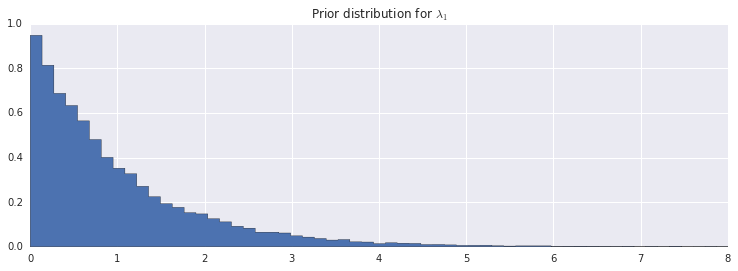

In [33]:
samples = [lambda_1.random() for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype="stepfilled")
plt.title("Prior distribution for $\lambda_1$")
plt.xlim(0, 8);

In [48]:
data = np.array([10, 5])
fixed_variable = pm.Poisson("fxd", 1, value=data, observed=True)
print "value: ", fixed_variable.value
print("calling .random()")
fixed_variable.random()
print "value: ", fixed_variable.value

value:  [10  5]
calling .random()
value:  [10  5]


In [51]:
n_data_points = 5
@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_data_points)
    out[:tau] = lambda_1  # lambda before tau is lambda1
    out[tau:] = lambda_2  # lambda after tau is lambda2
    return out

In [52]:
data = np.array([10, 25, 15, 20, 35])
obs = pm.Poisson("obs", lambda_, value=data, observed=True)
print(obs.value)

[10 25 15 20 35]


In [53]:
model = pm.Model([obs, lambda_, lambda_1, lambda_2, tau])

## Generate sample artificial data.

In [75]:
tau = pm.rdiscrete_uniform(0, 80)
print(tau)

24


In [76]:
alpha = 1. / 20.
lambda_1, lambda_2 = pm.rexponential(alpha, 2)
print(lambda_1, lambda_2)

(47.125470336257067, 12.62014158021843)


In [77]:
data = np.r_[pm.rpoisson(lambda_1, tau), pm.rpoisson(lambda_2, 80 - tau)]

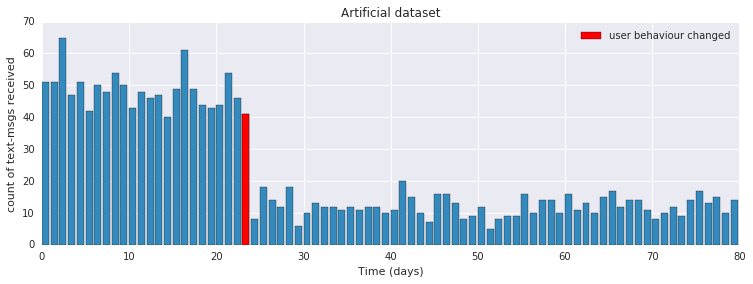

In [78]:
plt.bar(np.arange(80), data, color="#348ABD")
plt.bar(tau - 1, data[tau - 1], color="r", label="user behaviour changed")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Artificial dataset")
plt.xlim(0, 80)
plt.legend();

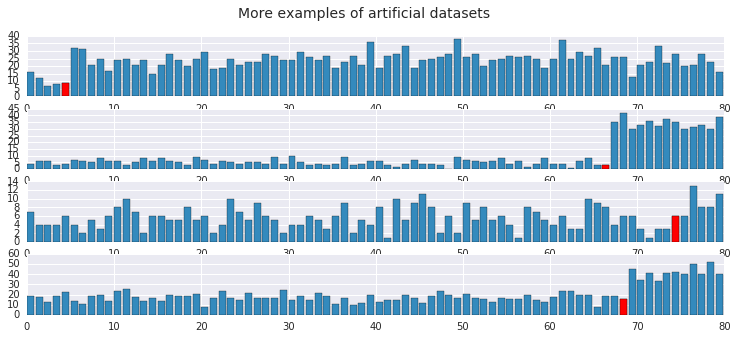

In [79]:
def plot_artificial_sms_dataset():
    tau = pm.rdiscrete_uniform(0, 80)
    alpha = 1. / 20.
    lambda_1, lambda_2 = pm.rexponential(alpha, 2)
    data = np.r_[pm.rpoisson(lambda_1, tau), pm.rpoisson(lambda_2, 80 - tau)]
    plt.bar(np.arange(80), data, color="#348ABD")
    plt.bar(tau - 1, data[tau - 1], color="r", label="user behaviour changed")
    plt.xlim(0, 80)

figsize(12.5, 5)
plt.suptitle("More examples of artificial datasets", fontsize=14)
for i in range(1, 5):
    plt.subplot(4, 1, i)
    plot_artificial_sms_dataset()